## Predicting house prices

### Load data from databse

In [5]:
import pandas as pd
from sqlalchemy import create_engine
import warnings
engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices_df = pd.read_sql_query('select * from houseprices',con=engine2)
engine2.dispose()

In [26]:

houseprices_df.info()
houseprices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### data cleaning
check for any nulls missing values, datatypes and fix it

In [28]:
for fetr in houseprices_df.columns:
    print(f"{fetr} column unique : {houseprices_df[fetr].unique()}")

id column unique : [   1    2    3 ... 1458 1459 1460]
mssubclass column unique : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
mszoning column unique : ['RL' 'RM' 'C (all)' 'FV' 'RH']
lotfrontage column unique : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
lotarea column unique : [ 8450  9600 11250 ... 17217 13175  9717]
street column unique : ['Pave' 'Grvl']
alley column unique : [None 'Grvl' 'Pave']
lotshape column unique : ['Reg' 'IR1' 'IR2' 'IR3']
landcont

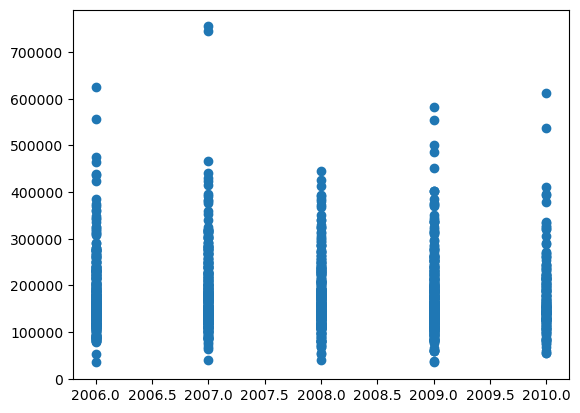

In [24]:
import matplotlib.pyplot as plt
plt.scatter(houseprices_df['yrsold'], houseprices_df['saleprice'])

In [55]:
# select features  year build, sqfeet , lot area , full bath ,halfbath, overallcond, live area
fea_df = houseprices_df[['yearbuilt','lotarea','fullbath','halfbath','grlivarea','overallcond','saleprice']]

<Axes: xlabel='overallcond'>

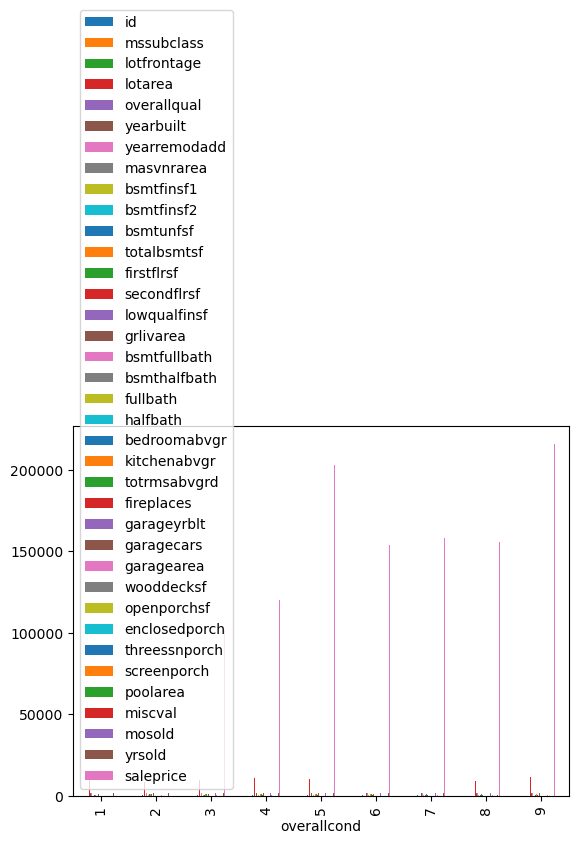

In [62]:
houseprices_df.groupby('overallcond').mean('saleprice').plot(kind = "bar")

In [63]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yearbuilt    1460 non-null   int64
 1   lotarea      1460 non-null   int64
 2   fullbath     1460 non-null   int64
 3   halfbath     1460 non-null   int64
 4   grlivarea    1460 non-null   int64
 5   overallcond  1460 non-null   int64
 6   saleprice    1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [76]:
# bath and condition categorical
bath_df = pd.get_dummies(fea_df['fullbath'],dtype=int).rename(columns=lambda x:'fb_' +str(x))
new_df = fea_df.drop(['fullbath'], axis =1).merge(bath_df,left_index=True, right_index=True)

In [79]:

bath_df = pd.get_dummies(fea_df['halfbath'],dtype=int).rename(columns=lambda x:'hb_' +str(x))
new2_df = new_df.drop(['halfbath'], axis =1).merge(bath_df,left_index=True, right_index=True)

In [80]:
new2_df.head()

,yearbuilt,lotarea,grlivarea,overallcond,saleprice,fb_0,fb_1,fb_2,fb_3,hb_0,hb_1,hb_2
0,2003,8450,1710,5,208500,0,0,1,0,0,1,0
1,1976,9600,1262,8,181500,0,0,1,0,1,0,0
2,2001,11250,1786,5,223500,0,0,1,0,0,1,0
3,1915,9550,1717,5,140000,0,1,0,0,1,0,0
4,2000,14260,2198,5,250000,0,0,1,0,0,1,0


In [83]:
# `Y` is the target variable
Y = new2_df['saleprice']
# `X` is the feature set which includes the
# `is_male` and `is_smoker` variables
X = new2_df.drop(['saleprice'], axis =1)

In [84]:
import statsmodels.api as sm

# You need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     369.4
Date:                Fri, 26 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:12:54   Log-Likelihood:                -17674.
No. Observations:                1460   AIC:                         3.537e+04
Df Residuals:                    1450   BIC:                         3.542e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.682e+06   6.31e+04    -26.655      0.000   -1.81e+06   -1.56e+06
yearbuilt    1330.9623     48.777     27.287      0.000    1235.282    1426.642
lotarea         0.6810      0.121      5.647      0.000       0.444       0.918
grlivarea     101.4269      3.387     29.948      0.000      94.783     108.070
overallcond  9907.3360   1122.709      8.824      0.000    7705.029    1.21e+04
fb_0        -3.922e+05   1.92e+04    -20.466      0.000    -4.3e+05   -3.55e+05
fb_1          -4.3e+05   1.53e+04    -28.071      0.000    -4.6e+05      -4e+05
fb_2        -4.445e+05   1.69e+04    -26.339      0.000   -4.78e+05   -4.11e+05
fb_3        -4.149e+05   1.88e+04    -22.026      0.000   -4.52e+05   -3.78e+05
hb_0        -5.345e+05   2.09e+04    -25.544      0.000   -5.76e+05   -4.93e+05
hb_1        -5.489e+05   2.18e+04    -25.234      0.000   -5.92e+05   -5.06e+05
hb_2        -5.981e+05   2.32e+04    -25.772      0.000   -6.44e+05   -5.53e+05
==============================================================================
Omnibus:                      390.195   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27402.846
Skew:                          -0.190   Prob(JB):                         0.00
Kurtosis:                      24.221   Cond. No.                     7.69e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
predictions = results.predict(X)

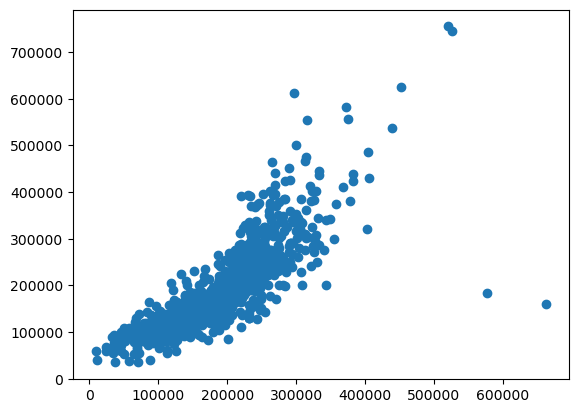

In [88]:
plt.scatter(predictions, Y)
plt.show()